In [1]:
#Penn/Mayo Clinic Seizure Detection Challenge on Kaggle
#Train a classifier to do the job of the physician, namely to look at
#segments of EEG data acquired across time and recognize when these indicate a seizure

import matplotlib
import seizure_detection_simple

data = seizure_detection_simple.doload('Dog_1', False, False)

Reading from clips/Dog_1/ 596 596


C:\Users\GSX\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  after removing the cwd from sys.path.


In [2]:
data

<class 'pandas.core.panel.Panel'>
Dimensions: 596 (items) x 400 (major_axis) x 17 (minor_axis)
Items axis: ictal_1 to interictal_99
Major_axis axis: 0 to 399
Minor_axis axis: 0 to time

In [3]:
data.keys()

Index(['ictal_1', 'ictal_10', 'ictal_100', 'ictal_101', 'ictal_102',
       'ictal_103', 'ictal_104', 'ictal_105', 'ictal_106', 'ictal_107',
       ...
       'interictal_90', 'interictal_91', 'interictal_92', 'interictal_93',
       'interictal_94', 'interictal_95', 'interictal_96', 'interictal_97',
       'interictal_98', 'interictal_99'],
      dtype='object', length=596)

In [4]:
data['ictal_1'].keys()

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 'time'], dtype='object')

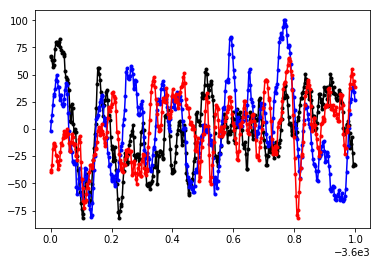

In [5]:
seizure_detection_simple.plot(data)

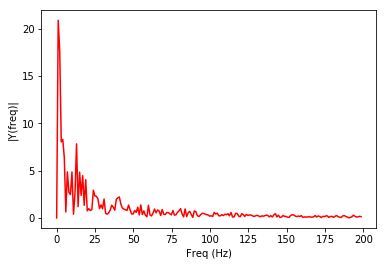

In [6]:
seizure_detection_simple.plotSpectrum(data['ictal_1'][0], 399)

In [7]:
#Function fft separates out the amplitudes for data in the 1Hz frequency band, 2Hz, … up to 47Hz

import numpy as np

def fft(time_data):
    return np.log10(np.absolute(np.fft.rfft(time_data, axis=1)[:,1:48]))


In [21]:
# For each segment in data.keys(), take data[segment], transpose it, and call fft() on it.

#reshape to make 1D
# Take the result (all channels by all 47 frequencies) and convert it into a 1D array.
# This is a feature row in 2D array X.
# Set the class label for the same row in 1D array y, dependong on if the segment name 
# includes 'interictal' (this is a non-match) vs 'ictal' (this is a match)
X=np.zeros((len(data.keys()), 799))
y=np.zeros(len(data.keys()))
i=0
for segment in data.keys():
    temp=fft(np.transpose(data[segment]))
    X[i]=temp.flatten()
    if 'interictal' in segment:
        y[i]=0
    else:
        y[i]=1
    i=i+1


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
import sklearn.model_selection as ms
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

#classifier_results=[]

#LogReg_L1 = LogisticRegression(penalty='l1', random_state=42,solver='liblinear')
#LogReg_L2 = LogisticRegression(penalty='l2', random_state=42, solver='liblinear')
#SVC=SVC(random_state=42)


#X_train, X_test, y_train, y_test = ms.train_test_split(X, 
                                                    #y, test_size=0.3, random_state=42)


#pipe = Pipeline([('scl', StandardScaler()), ('clf', BaggingClassifier(n_estimators=31, random_state=42))])
#train_sizes, train_scores, test_scores=learning_curve(estimator=pipe,
#                                                     X=X_train,
#                                                     y=y_train,
#                                                     train_sizes=np.linspace(0.1,1.0,10),
#                                                     cv=10,
#                                                     n_jobs=1)




#train_scores_mean = np.mean(train_scores, axis=1)
#train_scores_std = np.std(train_scores, axis=1)
#test_scores_mean = np.mean(test_scores, axis=1)
#test_scores_std = np.std(test_scores, axis=1)

#pipe.fit(X_train,y_train)
#y_pred=pipe.predict(X_test)
#test_score = pipe.score(X_test, y_test)

#classifier_results.append({'Classifier': 'Bagging Decision Tree', 'Test Score': test_score, 'Precision': precision_score(y_true=y_test, y_pred=y_pred), 'Recall': recall_score(y_true=y_test, y_pred=y_pred),'F1 Score': f1_score(y_true=y_test, y_pred=y_pred)})


#Random Forest

#pipe_rf = Pipeline([('scl', StandardScaler()), ('clf', RandomForestClassifier(n_estimators=31, random_state=42))])
#train_sizes_rf, train_scores_rf, test_scores_rf=learning_curve(estimator=pipe_rf,
#                                                     X=X_train,
#                                                      y=y_train,
#                                                      train_sizes=np.linspace(0.1,1.0,10),
#                                                      cv=10,
#                                                      n_jobs=1)



# train_scores_rf_mean = np.mean(train_scores_rf, axis=1)
# train_scores_rf_std = np.std(train_scores_rf, axis=1)
# test_scores_rf_mean = np.mean(test_scores_rf, axis=1)
# test_scores_rf_std = np.std(test_scores_rf, axis=1)

# pipe_rf.fit(X_train,y_train)
# y_pred=pipe_rf.predict(X_test)
# test_score = pipe_rf.score(X_test, y_test)

# #print('Test Score Random Forest: %.3f' % test_score_rf)
# #print('Precision Random Forest: %.3f' % precision_score(y_true=y_test, y_pred=y_pred_rf))
# #print('Recall Random Forest: %.3f' % recall_score(y_true=y_test, y_pred=y_pred_rf))
# #print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred_rf))

# classifier_results.append({'Classifier': 'Random Forest', 'Test Score': test_score, 'Precision': precision_score(y_true=y_test, y_pred=y_pred), 'Recall': recall_score(y_true=y_test, y_pred=y_pred),'F1 Score': f1_score(y_true=y_test, y_pred=y_pred)})


# #Bagging Logistic Regression L1

# pipe = Pipeline([('scl', StandardScaler()), ('clf', BaggingClassifier(base_estimator=LogReg_L1, n_estimators=31, random_state=314))])
# train_sizes, train_scores, test_scores=learning_curve(estimator=pipe,
#                                                      X=X_train,
#                                                      y=y_train,
#                                                      train_sizes=np.linspace(0.1,1.0,10),
#                                                      cv=10,
#                                                      n_jobs=1)




# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)

# pipe.fit(X_train,y_train)
# y_pred=pipe.predict(X_test)
# test_score = pipe.score(X_test, y_test)

# classifier_results.append({'Classifier': 'L1 Bagging LogReg', 'Test Score': test_score, 'Precision': precision_score(y_true=y_test, y_pred=y_pred), 'Recall': recall_score(y_true=y_test, y_pred=y_pred),'F1 Score': f1_score(y_true=y_test, y_pred=y_pred)})

# #Bagging Logistic Regression L2
# pipe = Pipeline([('scl', StandardScaler()), ('clf', BaggingClassifier(base_estimator=LogReg_L2, n_estimators=31, random_state=314))])
# train_sizes, train_scores, test_scores=learning_curve(estimator=pipe,
#                                                      X=X_train,
#                                                      y=y_train,
#                                                      train_sizes=np.linspace(0.1,1.0,10),
#                                                      cv=10,
#                                                      n_jobs=1)




# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)

# pipe.fit(X_train,y_train)
# y_pred=pipe.predict(X_test)
# test_score = pipe.score(X_test, y_test)

# classifier_results.append({'Classifier': 'L2 Bagging LogReg', 'Test Score': test_score, 'Precision': precision_score(y_true=y_test, y_pred=y_pred), 'Recall': recall_score(y_true=y_test, y_pred=y_pred),'F1 Score': f1_score(y_true=y_test, y_pred=y_pred)})


# #Bagging SVM
# pipe = Pipeline([('scl', StandardScaler()), ('clf', BaggingClassifier(base_estimator=SVC, n_estimators=31, random_state=314))])
# train_sizes, train_scores, test_scores=learning_curve(estimator=pipe,
#                                                      X=X_train,
#                                                      y=y_train,
#                                                      train_sizes=np.linspace(0.1,1.0,10),
#                                                      cv=10,
#                                                      n_jobs=1)




# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)

# pipe.fit(X_train,y_train)
# y_pred=pipe.predict(X_test)
# test_score = pipe.score(X_test, y_test)

# classifier_results.append({'Classifier': 'Bag SVM', 'Test Score': test_score, 'Precision': precision_score(y_true=y_test, y_pred=y_pred), 'Recall': recall_score(y_true=y_test, y_pred=y_pred),'F1 Score': f1_score(y_true=y_test, y_pred=y_pred)})


# #Boost Dec Tree
# pipe = Pipeline([('scl', StandardScaler()), ('clf', AdaBoostClassifier(n_estimators=31, random_state=42))])
# train_sizes, train_scores, test_scores=learning_curve(estimator=pipe,
#                                                      X=X_train,
#                                                      y=y_train,
#                                                      train_sizes=np.linspace(0.1,1.0,10),
#                                                      cv=10,
#                                                      n_jobs=1)




# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)

# pipe.fit(X_train,y_train)
# y_pred=pipe.predict(X_test)
# test_score = pipe.score(X_test, y_test)

# classifier_results.append({'Classifier': 'Boost Dec Tree', 'Test Score': test_score, 'Precision': precision_score(y_true=y_test, y_pred=y_pred), 'Recall': recall_score(y_true=y_test, y_pred=y_pred),'F1 Score': f1_score(y_true=y_test, y_pred=y_pred)})

# #Boost LogReg L1
# pipe = Pipeline([('scl', StandardScaler()), ('clf', AdaBoostClassifier(base_estimator=LogReg_L1, n_estimators=31, random_state=314))])
# train_sizes, train_scores, test_scores=learning_curve(estimator=pipe,
#                                                      X=X_train,
#                                                      y=y_train,
#                                                      train_sizes=np.linspace(0.1,1.0,10),
#                                                      cv=10,
#                                                      n_jobs=1)




# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)

# pipe.fit(X_train,y_train)
# y_pred=pipe.predict(X_test)
# test_score = pipe.score(X_test, y_test)

# classifier_results.append({'Classifier': 'Boost LogRegL1', 'Test Score': test_score, 'Precision': precision_score(y_true=y_test, y_pred=y_pred), 'Recall': recall_score(y_true=y_test, y_pred=y_pred),'F1 Score': f1_score(y_true=y_test, y_pred=y_pred)})

# #Boost SVM
# pipe = Pipeline([('scl', StandardScaler()), ('clf', AdaBoostClassifier(algorithm='SAMME', n_estimators=31, random_state=314))])
# train_sizes, train_scores, test_scores=learning_curve(estimator=pipe,
#                                                      X=X_train,
#                                                      y=y_train,
#                                                      train_sizes=np.linspace(0.1,1.0,10),
#                                                      cv=10,
#                                                      n_jobs=1)




# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)

# pipe.fit(X_train,y_train)
# y_pred=pipe.predict(X_test)
# test_score = pipe.score(X_test, y_test)

# classifier_results.append({'Classifier': 'Boost SVM', 'Test Score': test_score, 'Precision': precision_score(y_true=y_test, y_pred=y_pred), 'Recall': recall_score(y_true=y_test, y_pred=y_pred),'F1 Score': f1_score(y_true=y_test, y_pred=y_pred)})

# #Boost LogRegL2

# #pipe = Pipeline([('scl', StandardScaler()), ('clf', AdaBoostClassifier(base_estimator=LogReg_L2, n_estimators=31, random_state=314))])
# #train_sizes, train_scores, test_scores=learning_curve(estimator=pipe,
# #                                                     X=X_train,
# #                                                     y=y_train,
# #                                                     train_sizes=np.linspace(0.1,1.0,10),
# #                                                     cv=10,
# #                                                     n_jobs=1)




# #train_scores_mean = np.mean(train_scores, axis=1)
# #train_scores_std = np.std(train_scores, axis=1)
# #test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)

# pipe.fit(X_train,y_train)
# y_pred=pipe.predict(X_test)
# test_score = pipe.score(X_test, y_test)

# classifier_results.append({'Classifier': 'LogReg L2 Boost', 'Test Score': test_score, 'Precision': precision_score(y_true=y_test, y_pred=y_pred), 'Recall': recall_score(y_true=y_test, y_pred=y_pred),'F1 Score': f1_score(y_true=y_test, y_pred=y_pred)})


# classifier_results

## Best Result

In [19]:
## Best classifier for seizure detection
pipe_rf = Pipeline([('scl', StandardScaler()), ('clf', RandomForestClassifier(n_estimators=31, random_state=42))])
train_sizes_rf, train_scores_rf, test_scores_rf=learning_curve(estimator=pipe_rf,
                                                     X=X_train,
                                                     y=y_train,
                                                     train_sizes=np.linspace(0.1,1.0,10),
                                                     cv=10,
                                                     n_jobs=1)



train_scores_rf_mean = np.mean(train_scores_rf, axis=1)
train_scores_rf_std = np.std(train_scores_rf, axis=1)
test_scores_rf_mean = np.mean(test_scores_rf, axis=1)
test_scores_rf_std = np.std(test_scores_rf, axis=1)

pipe_rf.fit(X_train,y_train)
y_pred=pipe_rf.predict(X_test)
test_score = pipe_rf.score(X_test, y_test)
test_score


1.0